# Binary classification visualizations
---

***Author: Piotr Skalski***

This notebook accompanies the article: <a href="https://towardsdatascience.com/https-medium-com-piotr-skalski92-deep-dive-into-deep-networks-math-17660bc376ba">Deep Dive into Math Behind Deep Networks</a>. This notebook shows how easy it is to visualize the movement of the classification boundary in a neural network.

### Imports

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

### Settings

In [2]:
# number of samples in the data set
N_SAMPLES = 1000
# ratio between training and test sets
TEST_SIZE = 0.1
# number of iterations of the model
N_EPOCHS = 50
# boundary of the graph
GRID_X_START = -1.5
GRID_X_END = 1.5
GRID_Y_START = -1.5
GRID_Y_END = 1.5
# output directory (the folder must be created on the drive)
OUTPUT_DIR = "binary_classification_vizualizations"

### Create artificial dataset

In [3]:
X, y = make_circles(n_samples=N_SAMPLES, factor=.3, noise=.10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=53)

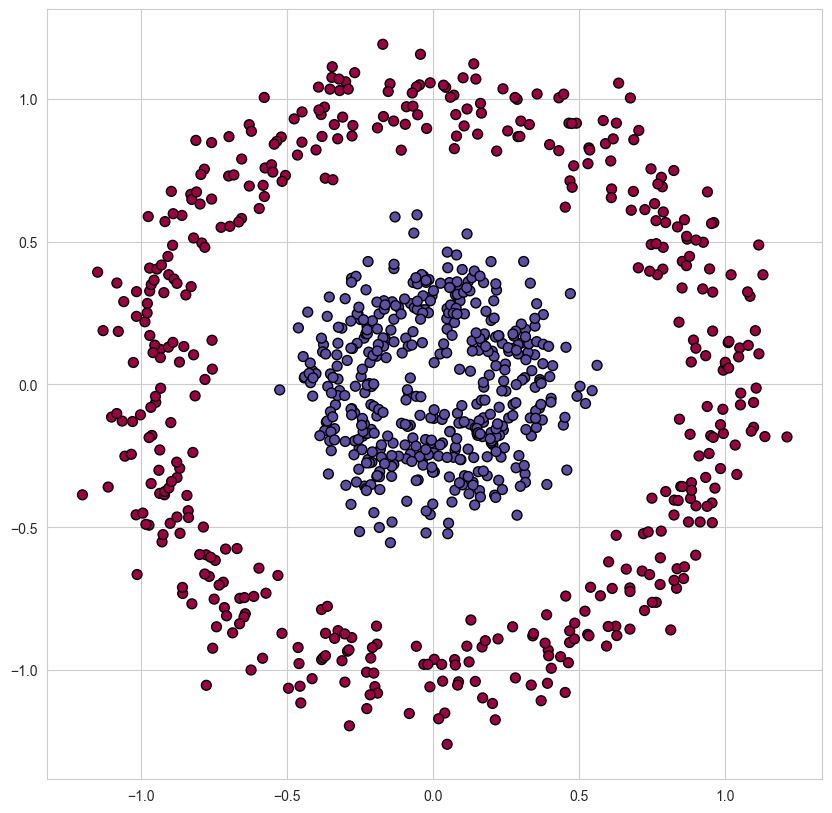

In [4]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='black');
plt.savefig("dataset.png")

### Definition of grid boundaries and storage of loss and accuracy history

In [5]:
grid = np.mgrid[GRID_X_START:GRID_X_END:100j,GRID_X_START:GRID_Y_END:100j]
grid_2d = grid.reshape(2, -1).T
X, Y = grid
acc_history = []
loss_history = []

### Auxiliary functions

In [6]:
# precede the number with zeros, creating a thong of a certain length
def makeIndexOfLength(index, length):
    indexStr = str(index)
    return ('0' * (length - len(indexStr)) + indexStr)

In [7]:
# the auxiliary function forming graphs of classification boundaries and change of accuracy
def save_model_prediction_graph(epoch, logs):
    prediction_probs = model.predict_proba(grid_2d, batch_size=32, verbose=0)
    plt.figure(figsize=(10,10))
    sns.set_style("whitegrid")
    plt.title('Binary classification with KERAS - epoch: ' + makeIndexOfLength(epoch, 3), fontsize=20)
    plt.xlabel('X', fontsize=15)
    plt.ylabel('Y', fontsize=15)
    plt.contourf(X, Y, prediction_probs.reshape(100, 100), alpha = 0.7, cmap=cm.Spectral)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.ravel(), s=50, cmap=plt.cm.Spectral, edgecolors='black')
    plt.savefig("./" + OUTPUT_DIR + "/keras" + makeIndexOfLength(epoch, 3) + ".png")
    plt.close()
    
    acc_history.append(logs['acc'])
    loss_history.append(logs['loss'])
    plt.figure(figsize=(12,8))
    sns.set_style("whitegrid")
    plt.plot(acc_history)
    plt.plot(loss_history)
    plt.title('Model accuracy and loss - epoch: ' + makeIndexOfLength(epoch, 3), fontsize=20)
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.xlim([0,N_EPOCHS])
    plt.legend(['accuracy', 'loss'], loc='upper left')
    plt.savefig("./" + OUTPUT_DIR + "/loss_acc_" + makeIndexOfLength(epoch, 3) + ".png")
    plt.close()

### Model definition

<img src="nn.png" alt="Model Architect">

In [8]:
# Creating a KERAS model
model = Sequential()
model.add(Dense(4, input_dim=2,activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [9]:
# Adding callback functions that they will run in every epoch
testmodelcb = keras.callbacks.LambdaCallback(on_epoch_end=save_model_prediction_graph)

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adamax', metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train, epochs=N_EPOCHS, verbose=0, callbacks=[testmodelcb])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

AttributeError: 'Sequential' object has no attribute 'predict_proba'

### Expected results

Nothing's going on? Don't worry... If you have created OUTPUT_DIR before, it should now be filled with successive frames of your future animation. My first frame looks like this, but yours certainly look different.  This is not a mistake. The neural network, which we visualize, each time we train it, will behave a bit differently.

<img src="keras000.png" alt="keras">

According to the settings I chose, a total of 50 such keyframes will be created.

<img src="keras_frames.png" alt="All frames">

Now all you need to do is enter OUTPUT_DIR and use ImageMagick to create a final gift with one command.

```bash
convert -delay 10 -loop 0 *.png keras_class_boundaries.gif
```

<img src="keras_class_boundaries.gif" alt="Keras Gif">

## Thank you
---

### Bibliography

1. <a href="https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/">
    How to Generate Test Datasets in Python with scikit-learn
</a>
2. <a href="https://playground.tensorflow.org/">
    Tensorflow playground
</a>
3. <a href="https://rubikscode.net/2018/02/12/implementing-simple-neural-network-using-keras-with-python-example/">
    Implementing Simple Neural Network using Keras – With Python Example
</a>